In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

from datafold.appfold import EDMD
from datafold.dynfold import DMDFull
from datafold.dynfold.transform import TSCPolynomialFeatures, TSCRadialBasis
from datafold.pcfold import GaussianKernel, TSCDataFrame
import matplotlib.pyplot as plt
from datafold.utils.general import sort_eigenpairs

from koopmaneigen.nonlinearsystem import NonLinear2dSystem

In [3]:
def limit_cycle(t, y):
        """ODE system."""
        
        y_dot[0] = 
        y_dot[1] = y[0] + y[1] * factor
        return y_dot

nonlinear_system = NonLinear2dSystem(limit_cycle)

In [4]:
nr_time_steps = 100
t_eval = np.linspace(0, 0.4, 21)

initial_conditions = np.array(
    np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
).T.reshape(-1, 2)

tsc_data = nonlinear_system.sample_system(initial_conditions, t_eval)

print(f"time delta: {tsc_data.delta_time}")
print(f"#time series: {tsc_data.n_timeseries}")
print(f"#time steps per time series: {tsc_data.n_timesteps}")
print(f"(n_samples, n_features): {tsc_data.shape}")
print(f"time interval {tsc_data.time_interval()}")
print(f"Same time values: {tsc_data.is_same_time_values()}")
print("")
print("Data snippet:")
tsc_data

time delta: 0.02
#time series: 400
#time steps per time series: 2
(n_samples, n_features): (800, 2)
time interval (0.0, 0.02)
Same time values: True

Data snippet:


feature         x1        x2
ID  time                    
0   0.00 -2.000000 -2.000000
    0.02 -1.735789 -1.806650
1   0.00 -2.000000 -1.789474
    0.02 -1.761250 -1.640450
2   0.00 -2.000000 -1.578947
...            ...       ...
397 0.02  1.785099  1.468187
398 0.00  2.000000  1.789474
    0.02  1.761250  1.640450
399 0.00  2.000000  2.000000
    0.02  1.735789  1.806650

[800 rows x 2 columns]

In [8]:
# function to add a single arrow in the following time series plots
idx_arrow = np.array([t_eval.shape[0] // 2 - 1, t_eval.shape[0] // 2])


def include_arrow(ax, df, color="black", hw = 0.05):
    ax.arrow(
        df.iloc[-2, 0],
        df.iloc[-2, 1],
        dx=df.iloc[-1, 0] - df.iloc[-2, 0],
        dy=df.iloc[-1, 1] - df.iloc[-2, 1],
        color=color,
        head_width=hw,
    )

In [9]:
dict_step = [
    (
        "polynomial",
        TSCPolynomialFeatures(degree=9),
    )
]

edmd_poly = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data)
edmd_poly_values = edmd_poly.predict(tsc_data.initial_states())
len_koopman_matrix = len(edmd_poly.named_steps["dmd"].eigenvectors_right_)
edmd_poly_values_oos = edmd_poly.predict(np.array([1, 2]), time_values=np.linspace(0, 7, 400))

print(f"shape of Koopman matrix: {len_koopman_matrix} x {len_koopman_matrix}")
edmd_poly.transform(tsc_data).head()

shape of Koopman matrix: 54 x 54


feature        x1        x2      x1^2     x1 x2      x2^2      x1^3   x1^2 x2  \
ID time                                                                         
0  0.00 -2.000000 -2.000000  4.000000  4.000000  4.000000 -8.000000 -8.000000   
   0.02 -1.735789 -1.806650  3.012962  3.135963  3.263986 -5.229866 -5.443370   
1  0.00 -2.000000 -1.789474  4.000000  3.578947  3.202216 -8.000000 -7.157895   
   0.02 -1.761250 -1.640450  3.102002  2.889243  2.691076 -5.463401 -5.088679   
2  0.00 -2.000000 -1.578947  4.000000  3.157895  2.493075 -8.000000 -6.315789   

feature   x1 x2^2      x2^3       x1^4  ...        x1^9     x1^8 x2  \
ID time                                 ...                           
0  0.00 -8.000000 -8.000000  16.000000  ... -512.000000 -512.000000   
   0.02 -5.665589 -5.896881   9.077943  ... -143.044684 -148.884325   
1  0.00 -6.404432 -5.730281  16.000000  ... -512.000000 -458.105263   
   0.02 -4.739658 -4.414575   9.622416  ... -163.075733 -151.890734   
2  0.00 -4.986150 -3.936434  16.000000  ... -512.000000 -404.210526   

feature   x1^7 x2^2   x1^6 x2^3   x1^5 x2^4   x1^4 x2^5   x1^3 x2^6  \
ID time                                                               
0  0.00 -512.000000 -512.000000 -512.000000 -512.000000 -512.000000   
   0.02 -154.962362 -161.288529 -167.872955 -174.726182 -181.859185   
1  0.00 -409.883657 -366.738008 -328.134008 -293.593586 -262.688998   
   0.02 -141.472888 -131.769580 -122.731800 -114.313901 -106.473366   
2  0.00 -319.113573 -251.931768 -198.893501 -157.021185 -123.964094   

feature   x1^2 x2^7     x1 x2^8        x2^9  
ID time                                      
0  0.00 -512.000000 -512.000000 -512.000000  
   0.02 -189.283385 -197.010669 -205.053412  
1  0.00 -235.037524 -210.296732 -188.160234  
   0.02  -99.170597  -92.368708  -86.033345  
2  0.00  -97.866390  -77.262939  -60.997057  

[5 rows x 54 columns]

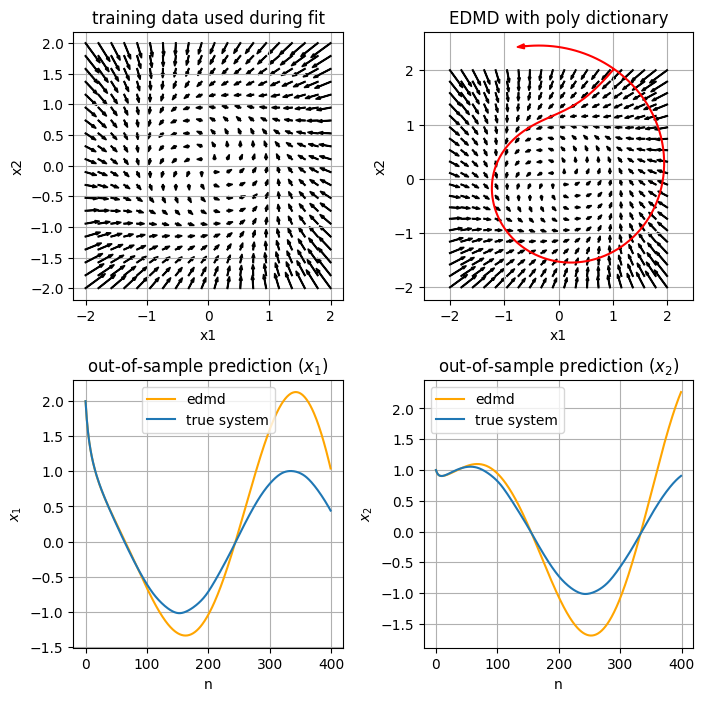

In [10]:
f, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for _id, df in tsc_data.itertimeseries():
    ax[0][0].plot(df["x1"].to_numpy(), df["x2"].to_numpy(), 0.1, c="black")
    include_arrow(ax[0][0], df)

ax[0][0].set_title("training data used during fit")
ax[0][0].set_xlabel("x1")
ax[0][0].set_ylabel("x2")
ax[0][0].axis("equal")
ax[0][0].grid()

for _id, df in edmd_poly_values.itertimeseries():
    ax[0][1].plot(df["x1"].to_numpy(), df["x2"].to_numpy(), 0.1, c="black")
    include_arrow(ax[0][1], df)

ax[0][1].plot(edmd_poly_values_oos["x1"], edmd_poly_values_oos["x2"], 0.1, c="red")
include_arrow(ax[0][1], edmd_poly_values_oos, color="red", hw = 0.09)

ax[0][1].set_title("EDMD with poly dictionary")
ax[0][1].set_xlabel("x1")
ax[0][1].set_ylabel("x2")
ax[0][1].axis("equal")
ax[0][1].grid()


# make out-of-sample prediction
initial_condition = np.array([2, 1])
t_eval = np.linspace(0, 7, 400)

ground_truth = nonlinear_system.generate_trajectory(initial_condition, t_eval)
predicted = edmd_poly.predict(initial_condition, t_eval)

ax[1][0].plot(range(predicted.shape[0]), predicted["x1"], c="orange", label="edmd")
ax[1][0].plot(range(ground_truth.shape[0]), ground_truth[:, 0], label="true system")

ax[1][0].set_title("out-of-sample prediction ($x_1$)")
ax[1][0].set_xlabel("n")
ax[1][0].set_ylabel("$x_1$")
ax[1][0].grid()
ax[1][0].legend()

ax[1][1].plot(range(predicted.shape[0]), predicted["x2"], c="orange", label="edmd")
ax[1][1].plot(range(ground_truth.shape[0]), ground_truth[:, 1], label="true system")

ax[1][1].set_title("out-of-sample prediction ($x_2$)")
ax[1][1].set_xlabel("n")
ax[1][1].set_ylabel("$x_2$")
ax[1][1].grid()
ax[1][1].legend()

In [11]:
def find_predicted_error(edmd_rbf):
    initial_conditions = [4 * np.random.rand(2) - 2 for i in range(50)]
    e = 0
    
    for ic in initial_conditions:

        t_eval = np.linspace(0, 7, 400)

        ground_truth = solve_ivp(
                limit_cycle, t_span=(t_eval[0], t_eval[-1]), y0=ic, t_eval=t_eval
            )["y"].T
        predicted = edmd_rbf.predict(ic, t_eval)

        e += np.linalg.norm(np.array(predicted - ground_truth))
    return e/len(initial_conditions)

In [ ]:
for epsilon in np.linspace(0.03,0.08,10):
    dict_step = [
        (
            "rbf",
            TSCRadialBasis(
                kernel=GaussianKernel(epsilon=epsilon), center_type="initial_condition"
            ),
        )
    ]

    edmd_rbf = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data)
    error = find_predicted_error(edmd_rbf)
    print(epsilon, error)


In [44]:
dict_step = [
    (
        "rbf",
        TSCRadialBasis(
            kernel=GaussianKernel(epsilon=0.03), center_type="initial_condition"
        ),
    )
]

edmd_rbf = EDMD(dict_steps=dict_step, include_id_state=True).fit(
    X=tsc_data
)  # Note that the "extended" part is in the transformations
edmd_rbf_values = edmd_rbf.predict(tsc_data.initial_states())
edmd_rbf_values_oos = edmd_rbf.predict(np.array([1, 2]), time_values=np.linspace(0, 7, 400))

len_koopman_matrix = len(edmd_rbf.named_steps["dmd"].eigenvectors_right_)
print(f"shape of Koopman matrix: {len_koopman_matrix} x {len_koopman_matrix}")
edmd_rbf.transform(tsc_data)

/Users/saksham/miniconda3/envs/code/lib/python3.8/site-packages/datafold/dynfold/dmd.py:1169: UserWarning: There are more observables than snapshots. The current implementation favors more snapshots than obserables. This may result in a bad computational performance.
  warnings.warn(
/Users/saksham/miniconda3/envs/code/lib/python3.8/site-packages/datafold/dynfold/dmd.py:1187: UserWarning: Shift matrix (shape=(402, 402)) has not full rank (=400), falling back to least squares solution. The sum of residuals is: 0.0
  warnings.warn(


shape of Koopman matrix: 402 x 402


feature         x1        x2           rbf0           rbf1           rbf2  \
ID  time                                                                    
0   0.00 -2.000000 -2.000000   1.000000e+00   4.777399e-01   5.209141e-02   
    0.02 -1.735789 -1.806650   1.675408e-01   3.108709e-01   1.316505e-01   
1   0.00 -2.000000 -1.789474   4.777399e-01   1.000000e+00   4.777399e-01   
    0.02 -1.761250 -1.640450   4.484114e-02   2.670926e-01   3.631034e-01   
2   0.00 -2.000000 -1.578947   5.209141e-02   4.777399e-01   1.000000e+00   
...            ...       ...            ...            ...            ...   
397 0.02  1.785099  1.468187  1.714018e-191  3.041808e-181  1.232058e-171   
398 0.00  2.000000  1.789474  1.762748e-220  2.981858e-209  1.151243e-198   
    0.02  1.761250  1.640450  4.710513e-199  2.800195e-188  3.799193e-178   
399 0.00  2.000000  2.000000  2.378353e-232  1.762748e-220  2.981858e-209   
    0.02  1.735789  1.806650  1.247065e-206  2.379770e-195  1.036487e-184   

feature            rbf3           rbf4           rbf5           rbf6  \
ID  time                                                               
0   0.00   1.296354e-03   7.363161e-06   9.545264e-09   2.824195e-12   
    0.02   1.272472e-02   2.807093e-04   1.413346e-06   1.624138e-09   
1   0.00   5.209141e-02   1.296354e-03   7.363161e-06   9.545264e-09   
    0.02   1.126631e-01   7.978404e-03   1.289536e-04   4.757009e-07   
2   0.00   4.777399e-01   5.209141e-02   1.296354e-03   7.363161e-06   
...                 ...            ...            ...            ...   
397 0.02  1.138973e-162  2.403139e-154  1.157251e-146  1.271917e-139   
398 0.00  1.014448e-188  2.040214e-179  9.364935e-171  9.811080e-163   
    0.02  1.176461e-168  8.314701e-160  1.341216e-151  4.937806e-144   
399 0.00  1.151243e-198  1.014448e-188  2.040214e-179  9.364935e-171   
    0.02  1.030329e-174  2.337603e-165  1.210455e-156  1.430572e-148   

feature            rbf7  ...         rbf390         rbf391         rbf392  \
ID  time                 ...                                                
0   0.00   1.907148e-16  ...  1.280236e-148  2.345913e-155  9.811080e-163   
    0.02   4.259717e-13  ...  3.338037e-128  2.375642e-134  3.858814e-141   
1   0.00   2.824195e-12  ...  1.594598e-142  1.280236e-148  2.345913e-155   
    0.02   4.005138e-10  ...  3.482876e-125  7.957078e-131  4.149085e-137   
2   0.00   9.545264e-09  ...  4.533100e-137  1.594598e-142  1.280236e-148   
...                 ...  ...            ...            ...            ...   
397 0.02  3.190608e-133  ...   1.660551e-14   1.130313e-10   1.756017e-07   
398 0.00  2.345913e-155  ...   2.939390e-21   1.907148e-16   2.824195e-12   
    0.02  4.149085e-137  ...   3.375465e-18   7.696336e-14   4.005138e-10   
399 0.00  9.811080e-163  ...   1.033982e-26   2.939390e-21   1.907148e-16   
    0.02  3.858814e-141  ...   3.483736e-22   2.549890e-17   4.259717e-13   

feature          rbf393         rbf394         rbf395         rbf396  \
ID  time                                                               
0   0.00  9.364935e-171  2.040214e-179  1.014448e-188  1.151243e-198   
    0.02  1.430572e-148  1.210455e-156  2.337603e-165  1.030329e-174   
1   0.00  9.811080e-163  9.364935e-171  2.040214e-179  1.014448e-188   
    0.02  4.937806e-144  1.341216e-151  8.314701e-160  1.176461e-168   
2   0.00  2.345913e-155  9.811080e-163  9.364935e-171  2.040214e-179   
...                 ...            ...            ...            ...   
397 0.02   6.226463e-05   5.038917e-03   9.307136e-02   3.923539e-01   
398 0.00   9.545264e-09   7.363161e-06   1.296354e-03   5.209141e-02   
    0.02   4.757009e-07   1.289536e-04   7.978404e-03   1.126631e-01   
399 0.00   2.824195e-12   9.545264e-09   7.363161e-06   1.296354e-03   
    0.02   1.624138e-09   1.413346e-06   2.807093e-04   1.272472e-02   

feature          rbf397         rbf398         rbf399  
ID  time                                               
0   0.00  

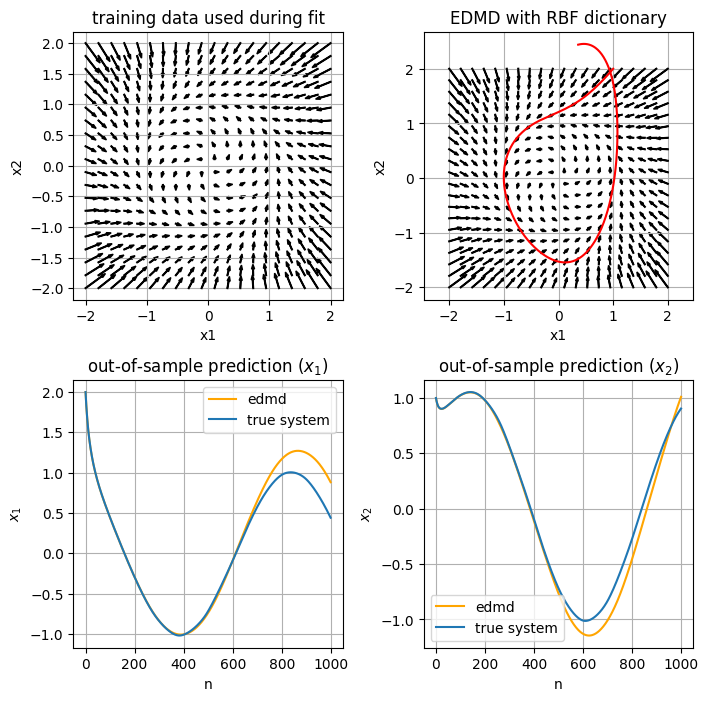

In [45]:
f, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for _id, df in tsc_data.itertimeseries():
    ax[0][0].plot(df["x1"].to_numpy(), df["x2"].to_numpy(), 0.1, c="black")
    include_arrow(ax[0][0], df)

ax[0][0].set_title("training data used during fit")
ax[0][0].set_xlabel("x1")
ax[0][0].set_ylabel("x2")
ax[0][0].axis("equal")
ax[0][0].grid()

for _id, df in edmd_rbf_values.itertimeseries():
    ax[0][1].plot(df["x1"].to_numpy(), df["x2"].to_numpy(), 0.1, c="black")
    include_arrow(ax[0][1], df)

ax[0][1].plot(edmd_rbf_values_oos["x1"], edmd_poly_values_oos["x2"], 0.1, c="red")
# include_arrow(ax[1], edmd_poly_values_oos, color="red", hw = 0.09)
    
ax[0][1].set_title("EDMD with RBF dictionary")
ax[0][1].set_xlabel("x1")
ax[0][1].set_ylabel("x2")
ax[0][1].axis("equal")
ax[0][1].grid()


# make out-of-sample prediction
initial_condition = np.array([2, 1])
t_eval = np.linspace(0, 7, 1000)

ground_truth = nonlinear_system.generate_trajectory(initial_condition, t_eval)
predicted = edmd_rbf.predict(initial_condition, t_eval)

ax[1][0].plot(range(predicted.shape[0]), predicted["x1"], c="orange", label="edmd")
ax[1][0].plot(range(ground_truth.shape[0]), ground_truth[:, 0], label="true system")

ax[1][0].set_title("out-of-sample prediction ($x_1$)")
ax[1][0].set_xlabel("n")
ax[1][0].set_ylabel("$x_1$")
ax[1][0].grid()
ax[1][0].legend()

ax[1][1].plot(range(predicted.shape[0]), predicted["x2"], c="orange", label="edmd")
ax[1][1].plot(range(ground_truth.shape[0]), ground_truth[:, 1], label="true system")

ax[1][1].set_title("out-of-sample prediction ($x_2$)")
ax[1][1].set_xlabel("n")
ax[1][1].set_ylabel("$x_2$")
ax[1][1].grid()
ax[1][1].legend()

In [46]:
nonlinear_system.generate_trajectory(initial_condition, t_eval)

array([[2.        , 1.        ],
       [1.93966457, 0.98688458],
       [1.88431376, 0.97540648],
       ...,
       [0.45327695, 0.89854345],
       [0.44695527, 0.90163092],
       [0.44059635, 0.90466538]])

In [47]:
tsc_data.tsc.shift_matrices(snapshot_orientation="row")[0].shape, tsc_data.tsc.shift_matrices(snapshot_orientation="row")[1].shape

((400, 2), (400, 2))

In [48]:
tsc_data.tsc.shift_matrices(snapshot_orientation="row")[0].shape, tsc_data.tsc.shift_matrices(snapshot_orientation="row")[1].shape

((400, 2), (400, 2))

In [49]:
from koopmaneigen.koopman_eigensolver import KoopmanEigenSolvers

In [50]:
koopman_eigen = KoopmanEigenSolvers(edmd_rbf, tsc_data)
print("shape of koopman matrix: ", koopman_eigen.koopman_matrix.shape)

/Users/saksham/miniconda3/envs/code/lib/python3.8/site-packages/datafold/dynfold/dmd.py:1169: UserWarning: There are more observables than snapshots. The current implementation favors more snapshots than obserables. This may result in a bad computational performance.
  warnings.warn(
/Users/saksham/miniconda3/envs/code/lib/python3.8/site-packages/datafold/dynfold/dmd.py:1187: UserWarning: Shift matrix (shape=(402, 402)) has not full rank (=400), falling back to least squares solution. The sum of residuals is: 0.0
  warnings.warn(


shape of koopman matrix:  (402, 402)


/Users/saksham/miniconda3/envs/code/lib/python3.8/site-packages/matplotlib/contour.py:1454: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z.max())
/Users/saksham/miniconda3/envs/code/lib/python3.8/site-packages/matplotlib/contour.py:1455: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z.min())
/Users/saksham/miniconda3/envs/code/lib/python3.8/site-packages/numpy/ma/core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


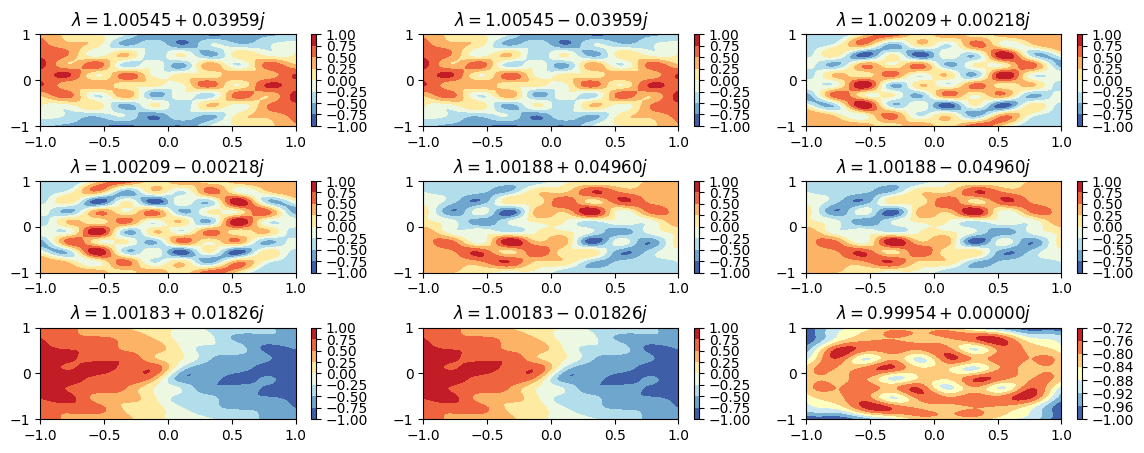

In [51]:
f, ax = plt.subplots(3, 3, figsize=(14, 5))
plt.subplots_adjust(hspace=0.6)

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
x_flat = np.array([X.flatten(), Y.flatten()]).T

koopman_eigenfunctions_eval = koopman_eigen.eigenfunction_left(koopman_eigen.left_koopman_eigvecs)(x_flat)

for i in range(9):
    
    Z = koopman_eigenfunctions_eval[:, i]
    Z = Z/np.max(np.abs(Z))
    
    h = ax[int(i/3)][i%3].contourf(X, Y, np.array(Z).reshape(100,100), cmap='RdYlBu_r')
    eig = koopman_eigen.left_koopman_eigvals[i]

    ax[int(i/3)][i%3].set_title(f"$\lambda = {eig:.5f}$")
    plt.colorbar(h)

In [52]:
koopman_eigen.dict_transform(x_flat).shape

(10000, 402)

to compute the trajectory error you need operator K applied on phi - K\phi(x) = \phi(Tx) that is explicit formulation of T is needed but we have T using the runge-kutta 45 solver

### this is a continuous system - have to define a small enough t and look at eigen equation

$K^t(\phi(x)) = e^{\lambda t} \phi(x))$

$K^t(\phi(x)) = \phi(\psi(t,x))$


$K^t(\phi(x)) = \lambda^t \phi(x))$  for t fixed


In [128]:
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)
x_flat = np.array([X.flatten(), Y.flatten()]).T

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
x_flat = tsc_data
x_flat.shape

In [129]:
t_eval = np.linspace(0, 0.4, 21)
t = t_eval[-1]

In [130]:
ground_truth[1,:]

array([1.93966457, 0.98688458])

In [131]:
def x_error(x, m, eigvalue):
    
    x = x.reshape(1,x.shape[0])
    
    phi_x = koopman_eigen.dict_transform(x)
    Tx_flat = np.apply_along_axis(lambda ic: nonlinear_system.generate_trajectory(ic, t_eval)[1,:],1, x)
    
    phi_Tx = koopman_eigen.dict_transform(Tx_flat)
    
    a = np.linalg.norm(phi_Tx - eigvalue *phi_x)
    
    s = 0
    for j in range(0, m):
        s += (np.linalg.norm(phi_Tx)**(m-1-j)) * (np.linalg.norm(phi_x)**j) * (eigvalue**j)
    
    return a*s

def const_traj_3(x_flat, m, eigvalue):
    c = np.linalg.norm(np.apply_along_axis(lambda x:x_error(x, m, eigvalue), 1, x_flat))
    
    c = c/np.sqrt(x_flat.shape[0])
    return c

In [132]:
# sorted_eig = 
sorted_eig = [(0,i) for i in range(1, 11)] + [(i,0) for i in range(1,11)] 

In [133]:
Tx_flat = np.apply_along_axis(lambda ic: nonlinear_system.generate_trajectory(ic, t_eval)[1,:],1, x_flat)

In [134]:
x_flat.shape

(10000, 2)

In [135]:
n_rand = [np.random.randint(10000) for _ in range(1000)]
x_flat_rand = x_flat[n_rand]
x_flat_rand.shape

Tx_flat_rand = Tx_flat[n_rand]
Tx_flat_rand.shape

(1000, 2)

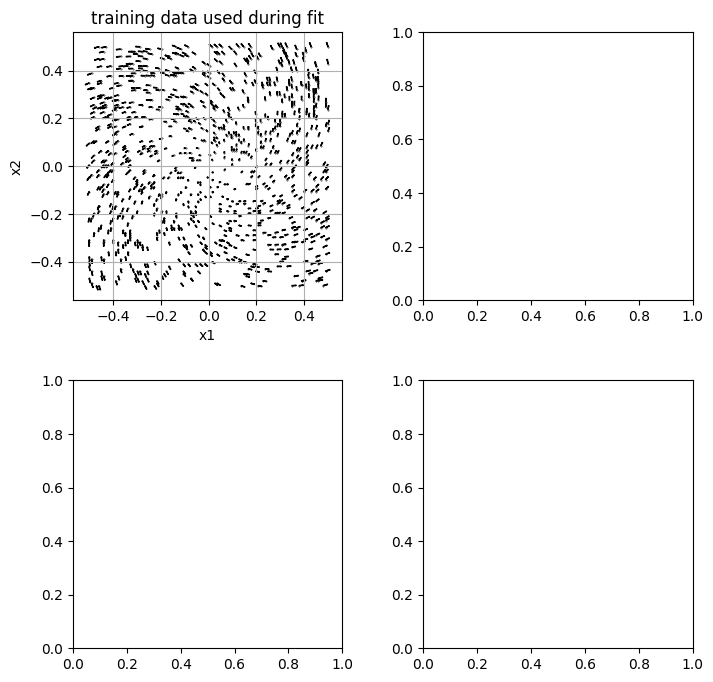

In [136]:
f, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

ax[0][0].scatter(x_flat_rand[:,0], x_flat_rand[:,1], 0.1, c="black")

for i in range(x_flat_rand.shape[0]):
    ax[0][0].arrow(
        x_flat_rand[i,0],
        x_flat_rand[i,1],
        dx=Tx_flat_rand[i,0] - x_flat_rand[i,0],
        dy=Tx_flat_rand[i,1] - x_flat_rand[i,1],
#         dx = 0.1,
#         dy = 0.1
#         head_width=hw,
    )

ax[0][0].set_title("training data used during fit")
ax[0][0].set_xlabel("x1")
ax[0][0].set_ylabel("x2")
ax[0][0].axis("equal")
ax[0][0].grid()



In [137]:
# f, ax = plt.subplots(4, 5, figsize=(50,30))
# plt.subplots_adjust(hspace=0.4)
error_list = []
c = 0
for i, (m,n) in enumerate(sorted_eig):
    Z_l = koopman_eigen.extend_eigenfunctions(x_flat, eigenvector_indexes=[0,1], pow_i=m, pow_j=n, 
                                                  normalize=False).flatten()
    Z_l_t = koopman_eigen.extend_eigenfunctions(Tx_flat, eigenvector_indexes=[0,1], pow_i=m, pow_j=n, 
                                                  normalize=False).flatten()
    
#     Z_l_t = Z_l_t.reshape(X.shape)
#     Z_l = Z_l.reshape(X.shape)

    Z_l_norm = Z_l/np.max(np.abs(Z_l))
    
    eigvalue_i_c = koopman_eigen.left_koopman_eigvals[0]
    eigvalue_j_c = koopman_eigen.left_koopman_eigvals[1]
    eig_c = (eigvalue_i_c)**m * (eigvalue_j_c) ** n
    
    eig_str_c = "$\\bar{\lambda}_{" + f"{m},{n}" + "}" + f"= {eigvalue_i_c:.3}^{{" + f"{m}" + "}" +f". {eigvalue_j_c:.3}^{{" + f"{n}" + "}$"
    
#     traj_error = np.linalg.norm(Z_l_t - (eig_c **(tsc_data.delta_time)) *Z_l)/np.sqrt(Z_l_t.shape[0])
    traj_error = np.linalg.norm(Z_l_t - (eig_c) *Z_l)/np.sqrt(Z_l_t.shape[0])
        
    rel_traj_error = traj_error/np.linalg.norm(Z_l_t)
        

    if n == 0:
        traj_error_bound = const_traj_3(x_flat, m, eigvalue_i_c)
    
    if m == 0:
        traj_error_bound = const_traj_3(x_flat, n, eigvalue_j_c)
    
    
    error_list.append({"m": m, "n":n , "traj_error": traj_error, "traj_error_bound": traj_error_bound})
    print(m, n, eig_c, traj_error, traj_error_bound)

0 1 (1.0054461622530253-0.03958911299540094j) 0.00037813875096513456 0.08747888304407839
0 2 (1.0093546873215744-0.07960944345645449j) 5.657208987226055e-06 0.2679358525530643
0 3 (1.0117001294670809-0.12000246617120278j) 7.662624361374358e-08 0.6160772986562284
0 4 (1.012459221330587-0.16070832981566835j) 1.0120732104466538e-09 1.260389137470823
0 5 (1.0116109382961505-0.20166593597174942j) 1.3161250786322284e-11 2.4197163502968912
0 6 (1.0091365600765376-0.2428130211235497j) 1.691446930331523e-13 4.463910590803251
0 7 (1.0050197293881595-0.28408624153839607j) 2.1548365457470433e-15 8.014055736388881
0 8 (0.999246507585197-0.3254212609330215j) 2.7282515483796156e-17 14.107641352066
0 9 (0.9918054271260915-0.36675284081969695j) 3.4401619800622253e-19 24.47012590453143
0 10 (0.9826875407490562-0.40801493342150574j) 4.327296023878928e-21 41.96050462008503
1 0 (1.0054461622530253+0.03958911299540094j) 0.00037813875096513456 0.08747888304407839
2 0 (1.0093546873215744+0.07960944345645449j)

In [138]:
for d in error_list:
    if d["n"]==0:
        print(str(d["m"]) + " && " + f"{d['traj_error_bound']:.4f}" + "$\\norm{\delta v}$\\\\")

1 && 0.0875$\norm{\delta v}$\\
2 && 0.2679$\norm{\delta v}$\\
3 && 0.6161$\norm{\delta v}$\\
4 && 1.2604$\norm{\delta v}$\\
5 && 2.4197$\norm{\delta v}$\\
6 && 4.4639$\norm{\delta v}$\\
7 && 8.0141$\norm{\delta v}$\\
8 && 14.1076$\norm{\delta v}$\\
9 && 24.4701$\norm{\delta v}$\\
10 && 41.9605$\norm{\delta v}$\\


In [139]:
for d in error_list:
    if d["m"]==0:
        print(str(d["n"]) + " && " + f"{d['traj_error_bound']:.4f}" + "$\\norm{\delta v}$\\\\")

1 && 0.0875$\norm{\delta v}$\\
2 && 0.2679$\norm{\delta v}$\\
3 && 0.6161$\norm{\delta v}$\\
4 && 1.2604$\norm{\delta v}$\\
5 && 2.4197$\norm{\delta v}$\\
6 && 4.4639$\norm{\delta v}$\\
7 && 8.0141$\norm{\delta v}$\\
8 && 14.1076$\norm{\delta v}$\\
9 && 24.4701$\norm{\delta v}$\\
10 && 41.9605$\norm{\delta v}$\\


KeyError: 'rel_traj_error'

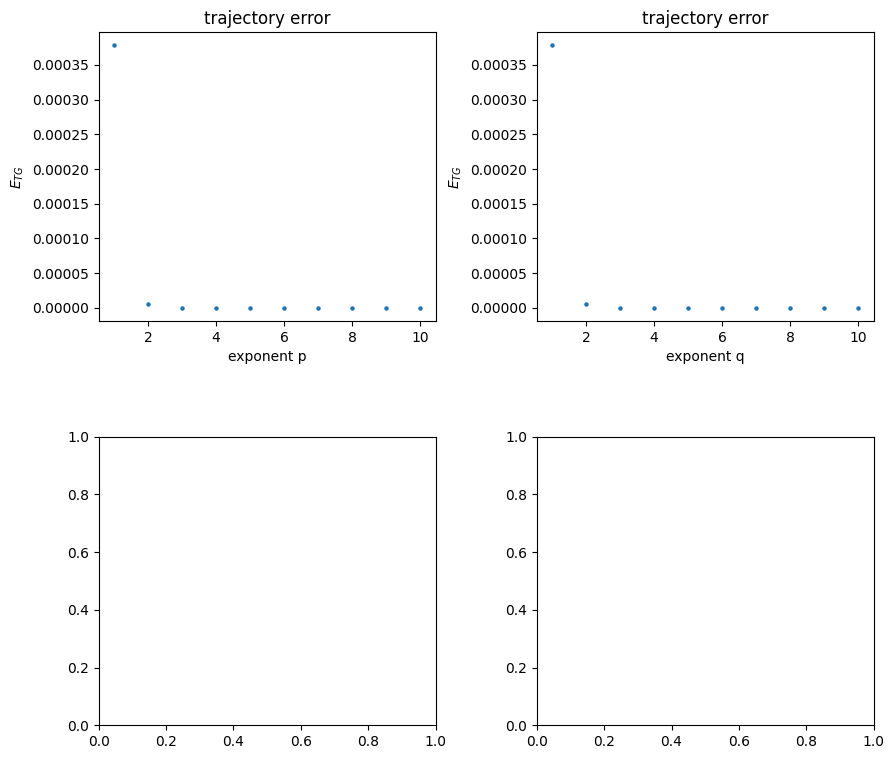

In [140]:
f, ax = plt.subplots(2,2, figsize=(10,9))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
m_list = [d["m"] for d in error_list if d["n"]==0]

col = np.array([d["traj_error"] for d in error_list if d["n"]==0])
col[col==-np.inf] = np.log10(np.finfo(np.float64).eps)

ax[0][0].scatter(m_list, col, s=5)
ax[0][0].set_xlabel('exponent p')
ax[0][0].set_ylabel('$E_{TG}$')
ax[0][0].set_title("trajectory error")
del col

col = np.array([d["traj_error"] for d in error_list if d["m"]==0])
col[col==-np.inf] = np.log10(np.finfo(np.float64).eps)

ax[0][1].scatter(m_list, col, s=5)
ax[0][1].set_xlabel('exponent q')
ax[0][1].set_ylabel('$E_{TG}$')
ax[0][1].set_title("trajectory error")
del col

col = np.array([d["rel_traj_error"] for d in error_list if d["n"]==0])
col[col==-np.inf] = np.log10(np.finfo(np.float64).eps)

ax[1][0].scatter(m_list, col, s=5)
ax[1][0].set_xlabel('exponent p')
ax[1][0].set_ylabel('$RE_{TG}$')
ax[1][0].set_title("relative trajectory error")
del col

col = np.array([d["rel_traj_error"] for d in error_list if d["m"]==0])
col[col==-np.inf] = np.log10(np.finfo(np.float64).eps)

ax[1][1].scatter(m_list, col, s=5)
ax[1][1].set_xlabel('exponent q')
ax[1][1].set_ylabel('$RE_{TG}$')
ax[1][1].set_title("relative trajectory error")
del col


f.suptitle('Error in eigenfunction approximation')
plt.savefig('plots/error_EDMD_rbf_nonlin_poly_eigfunc_approx.png', bbox_inches='tight')
plt.show()